# Trabajo practico computacional

## Fuerza de vínculo




$$F_v = 3mg\cos{\theta}+2kR\sin^2{\theta}-kR$$

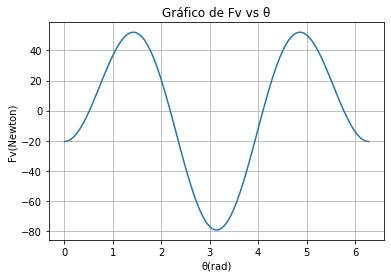

In [306]:
import numpy as np

from matplotlib import pyplot as plt
plt.ion()

# Definicion de constantes
pi = np.pi
g = 9.81

# Definicion de variables
m = 1
k = 50
R = 1
b = k*R

def θvsFv(m, θ, b):
      return 3*m*g*np.cos(θ) + 2*b*np.sin(θ)*np.sin(θ) - b
    
θ = np.linspace(0,2*pi,100)
y = θvsFv(m, θ, b)

plt.plot(θ,y)
plt.xlabel('θ(rad)')
plt.ylabel('Fv(Newton)')
plt.title('Gráfico de Fv vs θ')
plt.grid()

## Puntos de equilibrio

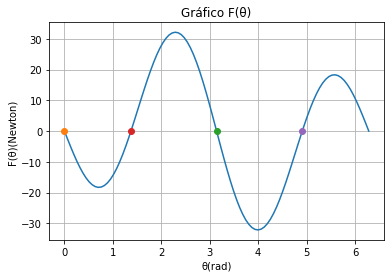

In [307]:
def ecuacion_de_movimiento(θ, k, m, R):
      return np.sin(θ)*(g/R - (k/m)*np.cos(θ))

y = ecuacion_de_movimiento(θ, k, m, R)

ceros = [
    [0, 0],
    [pi, 0],
    [np.arccos(m*g/(k*R)), 0],
    [2*pi - np.arccos(m*g/(k*R)), 0]
]

plt.plot(θ,y)
plt.xlabel('θ(rad)')
plt.ylabel('F(θ)(Newton)')
plt.title('Gráfico F(θ)')
plt.grid()

for cero in ceros:
    plt.plot([cero[0]],[cero[1]], 'o')

## Solución numérica

In [308]:
# Parámetros para la resolución numérica
t_i = 0 # tiempo inicial
t_f = 8 # tiempo final

dt = 0.01
t_array = np.linspace(t_i, t_f, (t_f-t_i)/dt) # Resultado aproximado: [0, 8/100, 2*8/100,...,100*8/100 = 8]

In [309]:
from scipy.integrate import odeint

theta_0 = 0
thetap_0 = 0.1

X0 = [theta_0, thetap_0]

class Solucion_numerica:
    def __init__(self):
        self.m = 1
        self.k = 50
        self.R = 1
        self.b = k*R
        self.t_i = 0 # tiempo inicial
        self.t_f = 8 # tiempo final
        self.dt = 0.01
        self.theta_0 = 0
        self.thetap_0 = 0.1
        
    def dθpdt(t, theta, thetap): # esto es la derivada segunda de θ respecto de t
          return (g/R) * np.sin(theta) - (k/m) * np.sin(theta) * np.cos(theta)

    def dθdt(t, theta, thetap):
          return thetap

    def ecdif(X, t):
        theta, thetap = X
        return [dθdt(t, theta, thetap), dθpdt(t, theta, thetap)]
    
    def get_solucion_odeint(self):
        t_array = np.linspace(t_i, t_f, (t_f-t_i)/dt)
        X0 = [self.theta_0, self.thetap_0]
        return [odeint(ecdif, X0, t_array), t_array]
    
    def plot(self):
        solucion, t_array = self.get_solucion_odeint()
        theta_odeint = solucion[:,0]
        plt.plot(t_array, theta_odeint, '-', label='Odeint', lw=3)
        plt.xlabel('tiempo (s)')
        plt.ylabel('θ (rad)')
        plt.grid()
        
    
    
    def set_m(self, value):
        self.m = value
        
    def set_k(self, value):
        self.k = value
        self.b = k*R
    
    def set_R(self, value):
        self.R = value
        self.b = k*R
        
    def get_m(self):
        return self.m
        
    def get_k(self):
        return self.k
    
    def get_R(self):
        return self.R
    
    def get_b(self):
        return self.b

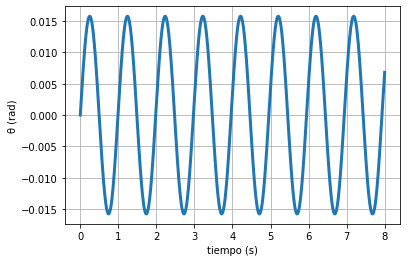

In [310]:
solucion_numerica_1 = Solucion_numerica()
solucion_numerica_1.plot()

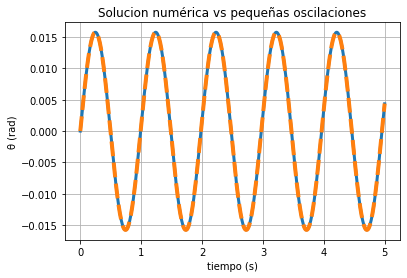

In [311]:
#Item C

omega_0 = np.sqrt(k/m - g/R) ##
A = -thetap_0/omega_0 ##
phi = np.pi/2 ##


dt = 0.00625
t_i2 = 0 # tiempo inicial
t_f2 = 5 # tiempo final

t_array = np.linspace(t_i2, t_f2, 500)

solucion = odeint(ecdif, X0, t_array) # en vez de pasarle un dt le pasamos el array de tiempos en el que queremos la sol.
theta_odeint = solucion[:,0]

plt.plot(t_array, theta_odeint, '-', label='Odeint', lw=3)
plt.xlabel('tiempo (s)')
plt.ylabel('θ (rad)')
plt.grid()
plt.title("Solucion numérica vs pequeñas oscilaciones")

# Pequeñas oscilaciones

#tita_aprox = A*np.sin(omega_0*t_array + phi)
tita_aprox = A*np.cos(omega_0*t_array + phi)

plt.plot(t_array, tita_aprox, '--', label='osci', lw=4)

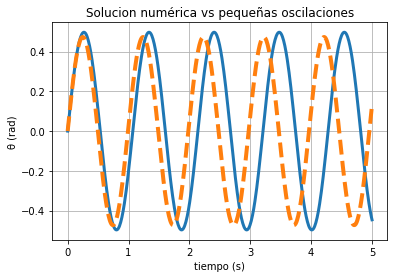

In [312]:
#2

thetap_0 = 3

omega_0 = np.sqrt(k/m - g/R) ##
A = -thetap_0/omega_0 ##
phi = np.pi/2 ##

dt = 0.00625
t_i2 = 0 # tiempo inicial
t_f2 = 5 # tiempo final

t_array = np.linspace(t_i2, t_f2, 500)

X0 = [theta_0, thetap_0]

solucion = odeint(ecdif, X0, t_array) # en vez de pasarle un dt le pasamos el array de tiempos en el que queremos la sol.
theta_odeint = solucion[:,0]

plt.plot(t_array, theta_odeint, '-', label='Odeint', lw=3)
plt.xlabel('tiempo (s)')
plt.ylabel('θ (rad)')
plt.grid()
plt.title("Solucion numérica vs pequeñas oscilaciones")

# Pequeñas oscilaciones

#tita_aprox = A*np.sin(omega_0*t_array + phi)
tita_aprox = A*np.cos(omega_0*t_array + phi)

plt.plot(t_array, tita_aprox, '--', label='osci', lw=4)

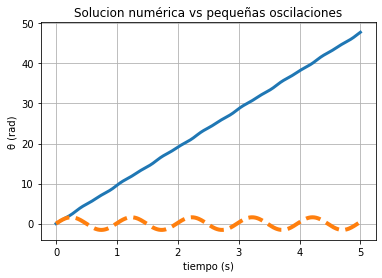

In [313]:
#2

thetap_0 = 10

omega_0 = np.sqrt(k/m - g/R) ##
A = -thetap_0/omega_0 ##
phi = np.pi/2 ##

dt = 0.00625
t_i2 = 0 # tiempo inicial
t_f2 = 5 # tiempo final

t_array = np.linspace(t_i2, t_f2, 500)

X0 = [theta_0, thetap_0]

solucion = odeint(ecdif, X0, t_array) # en vez de pasarle un dt le pasamos el array de tiempos en el que queremos la sol.
theta_odeint = solucion[:,0]

plt.plot(t_array, theta_odeint, '-', label='Odeint', lw=3)
plt.xlabel('tiempo (s)')
plt.ylabel('θ (rad)')
plt.grid()
plt.title("Solucion numérica vs pequeñas oscilaciones")

# Pequeñas oscilaciones

#tita_aprox = A*np.sin(omega_0*t_array + phi)
tita_aprox = A*np.cos(omega_0*t_array + phi)

plt.plot(t_array, tita_aprox, '--', label='osci', lw=4)

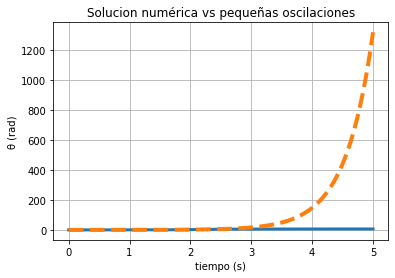

In [314]:
#D

k = 5

thetap_0 = 0.1

omega_0 = np.sqrt(g/R-k/m) ##
A = thetap_0/omega_0 ##
phi = 0

dt = 0.00625
t_i2 = 0 # tiempo inicial
t_f2 = 5 # tiempo final

t_array = np.linspace(t_i2, t_f2, 500)

X0 = [theta_0, thetap_0]

solucion = odeint(ecdif, X0, t_array) # en vez de pasarle un dt le pasamos el array de tiempos en el que queremos la sol.
theta_odeint = solucion[:,0]

plt.plot(t_array, theta_odeint, '-', label='Odeint', lw=3)
plt.xlabel('tiempo (s)')
plt.ylabel('θ (rad)')
plt.grid()
plt.title("Solucion numérica vs pequeñas oscilaciones")

# Pequeñas oscilaciones

tita_aprox = A*np.sinh(omega_0*t_array + phi)

plt.plot(t_array, tita_aprox, '--', label='osci', lw=4)
